In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(context='poster', rc={'figure.figsize':(12, 10)})

In [2]:
timing_df = pd.read_csv('UMAP Benchmark Results - Ambient dimension scaling.csv')
timing_df

,dimension,t-SNE,FIt-SNE,UMAP,log(dim),log(t-SNE),log(FIt-SNE),log(UMAP)
0,5,56.22,55.25,37.70,0.69897,1.749891,1.742332,1.576341
1,10,54.53,48.08,29.94,1.00000,1.736635,1.681964,1.476252
2,20,57.76,52.83,30.19,1.30103,1.761627,1.722881,1.479863
3,40,60.39,53.52,30.99,1.60206,1.780965,1.728516,1.491222
4,80,60.62,49.49,32.42,1.90309,1.782616,1.694517,1.510813
5,160,64.34,49.79,32.54,2.20412,1.808481,1.697142,1.512418
6,320,71.40,60.26,32.63,2.50515,1.853698,1.780029,1.513617
7,640,82.26,81.29,34.33,2.80618,1.915189,1.910037,1.535674
8,1280,105.02,147.67,38.77,3.10721,2.021272,2.169292,1.588496
9,2560,227.26,340.08,43.70,3.40824,2.356523,2.531581,1.640481


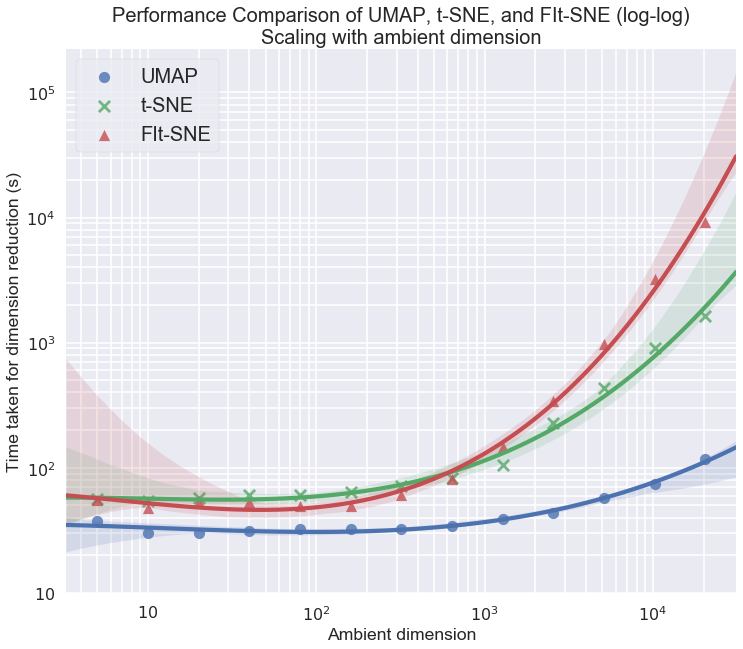

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

xticks = yticks = np.log10(np.hstack([
    np.arange(4, 10, 1),
    np.arange(10,100,10),
    np.arange(100, 1000, 100),
    np.arange(1000, 10000, 1000),
    np.arange(10000, 30000, 10000),
]))
#xtick_labels = [""] * 3 + ["$10^3$"] + [""]*8 + ["$10^4$"] + [""]*8 + ["$10^5$"] + [""]*8 + ["$10^6$"]
xtick_labels = [""] * 6 + ["$10$"] + [""]*8 + ["$10^2$"] + [""]*8 + ["$10^3$"] + [""]*8 + ["$10^4$"]
yticks = yticks = np.log10(np.hstack([
    np.arange(10,100,10),
    np.arange(100, 1000, 100),
    np.arange(1000, 10000, 1000),
    np.arange(10000, 100000, 10000),
    np.arange(100000, 200000, 100000)
]))
ytick_labels = ["$10$"] + [""]*8 + ["$10^2$"] +\
                [""]*8 + ["$10^{3}$"] + [""]*8 + ["$10^4$"] + [""]*8 + ["$10^5$"]

sns.regplot(x='log(dim)', y='log(UMAP)', data=timing_df, order=3, ax=ax, label='UMAP')
sns.regplot(x='log(dim)', y='log(t-SNE)', data=timing_df, order=3, ax=ax, label='t-SNE', marker='x')
sns.regplot(x='log(dim)', y='log(FIt-SNE)', data=timing_df, order=3, ax=ax, label='FIt-SNE', marker='^')
ax.set_xlabel('Ambient dimension')
ax.set_ylabel('Time taken for dimension reduction (s)')
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels);
plt.title('Performance Comparison of UMAP, t-SNE, and FIt-SNE (log-log)\nScaling with ambient dimension', fontsize=20)
plt.legend(loc='upper left', frameon=True, fancybox=True, fontsize=20)
plt.savefig('performance_comparison_ambient_dim.png')

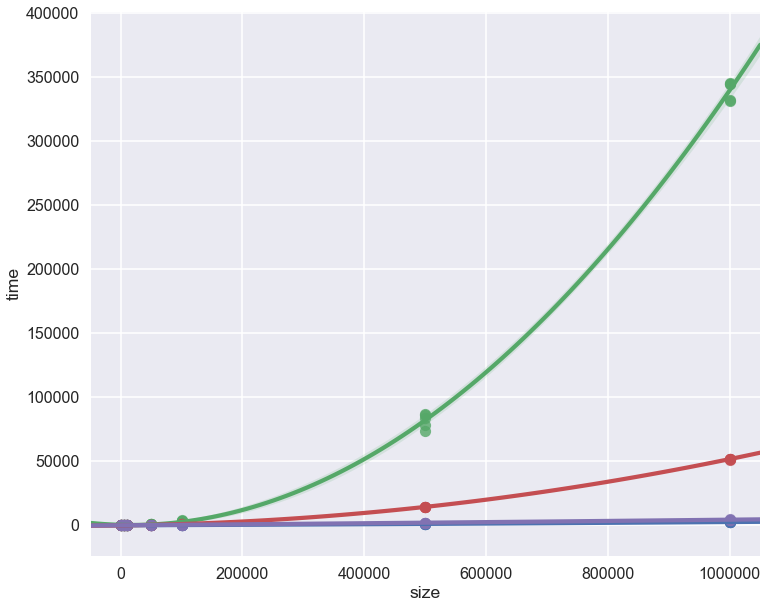

In [14]:
sns.regplot(x='size', y='time', data=(umap_timing_df[umap_timing_df['size'] <= 1000000]), order=2)
sns.regplot(x='size', y='time', data=(tsne_timing_df), order=2)
sns.regplot(x='size', y='time', data=(tsne_8core_timing_df), order=2)
sns.regplot(x='size', y='time', data=(fitsne_timing_df), order=2)